Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

 The random forest is an ensemble learning method, composed of multiple decision trees. By averaging out the impact of several decision trees, random forests tend to improve prediction.

Random forests tend to shine in scenarios where a model has a large number of features that individually have weak predicative power but much stronger power collectively.

Ensemble methods use multiple learning models to gain better predictive results — in the case of a random forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

## Decision Trees
Decision trees are simple but intuitive models that utilize a top-down approach in which the root node creates binary splits until a certain criteria is met. This binary splitting of nodes provides a predicted value based on the interior nodes leading to the terminal (final) nodes. In a classification context, a decision tree will output a predicted target class for each terminal node produced.

Although intuitive, decision trees have limitations that prevent them from being useful in machine learning applications. 

## Limitations to Decision Trees
Decision trees tend to have high variance when they utilize different training and test sets of the same data, since they tend to overfit on training data. This leads to poor performance on unseen data. Unfortunately, this limits the usage of decision trees in predictive modeling. However, using ensemble methods, we can create models that utilize underlying decision trees as a foundation for producing powerful results.

## The Random Forests Algorithm
Let’s understand the algorithm in layman’s terms. Suppose you want to go on a trip and you would like to travel to a place which you will enjoy.

So what do you do to find a place that you will like? You can search online, read reviews on travel blogs and portals, or you can also ask your friends.

Let’s suppose you have decided to ask your friends, and talked with them about their past travel experience to various places. You will get some recommendations from every friend. Now you have to make a list of those recommended places. Then, you ask them to vote (or select one best place for the trip) from the list of recommended places you made. The place with the highest number of votes will be your final choice for the trip.

In the above decision process, there are two parts. First, asking your friends about their individual travel experience and getting one recommendation out of multiple places they have visited. This part is like using the decision tree algorithm. Here, each friend makes a selection of the places he or she has visited so far.

The second part, after collecting all the recommendations, is the voting procedure for selecting the best place in the list of recommendations. This whole process of getting recommendations from friends and voting on them to find the best place is known as the random forests algorithm.

It technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result. In the case of regression, the average of all the tree outputs is considered as the final result. It is simpler and more powerful compared to the other non-linear classification algorithms.

### How does the algorithm work?
It works in four steps:

1.Select random samples from a given dataset.
2.Construct a decision tree for each sample and get a prediction result from each decision tree.
3.Perform a vote for each predicted result.
4.Select the prediction result with the most votes as the final prediction.


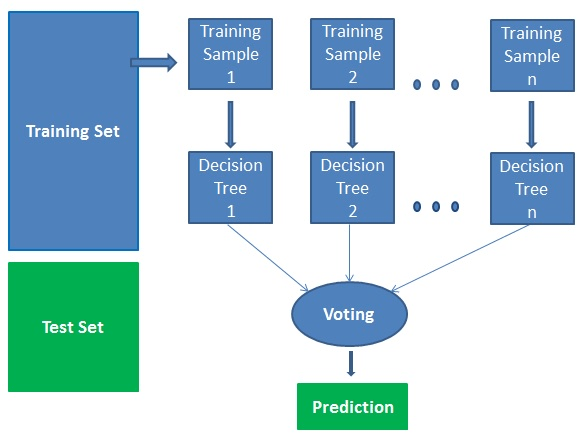

### Advantages:
1.Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.

2.It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

3.The algorithm can be used in both classification and regression problems.

4.Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.

5.You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

### Disadvantages:
1.Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.

2.The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.




### Bootstrap Aggregating Trees
Through a process known as bootstrap aggregating (or bagging), it’s possible to create an ensemble (forest) of trees where multiple training sets are generated with replacement, meaning data instances — or in the case of this tutorial, patients — can be repeated. Once the training sets are created, a CART model can be trained on each subsample.

This approach helps reduce variance by averaging the ensemble's results, creating a majority-votes model. Another important feature of bagging trees is that the resulting model uses the entire feature space when considering node splits. Bagging trees allow the trees to grow without pruning, reducing the tree-depth sizes and resulting in high variance but lower bias, which can help improve predictive power.

However, a downside to this process is that the utilization of the entire feature space creates a risk of correlation between trees, increasing bias in the model.



In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')


In [3]:
#Let's check how the data is distributed
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Let's do some plotting to know how the data columns are distributed in the dataset

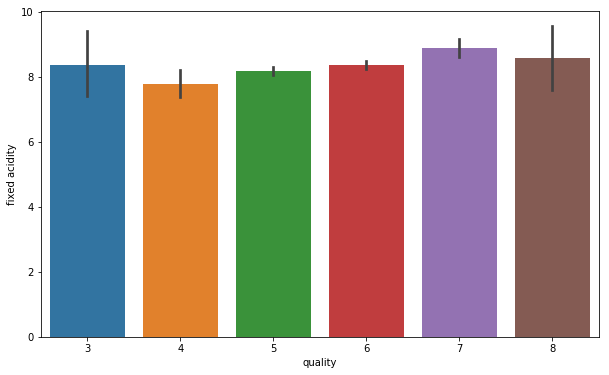

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)


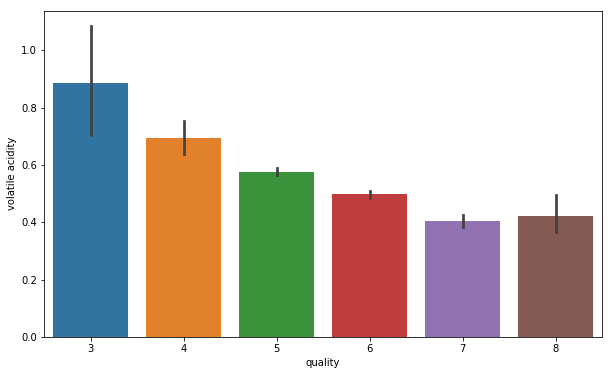

In [6]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

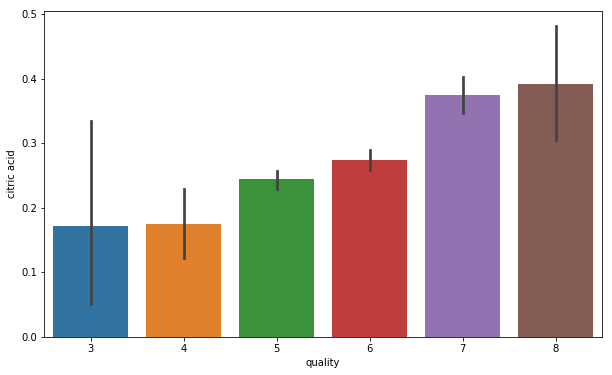

In [7]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

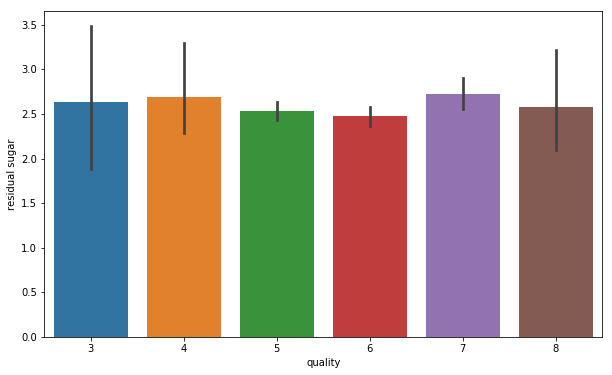

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)


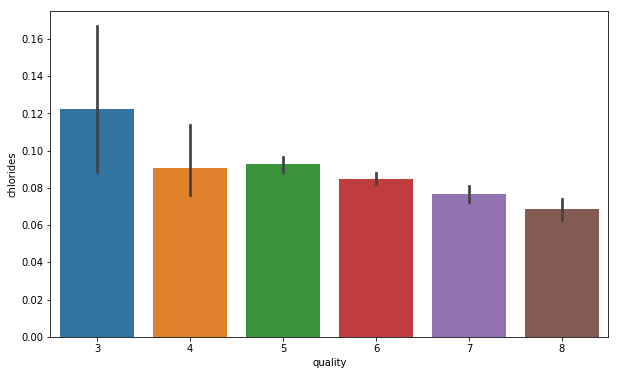

In [9]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)


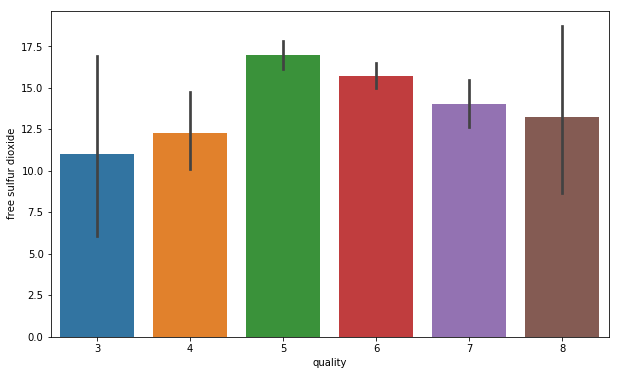

In [10]:
ig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

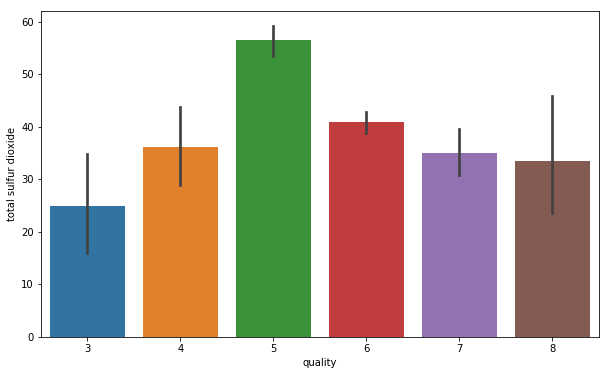

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)


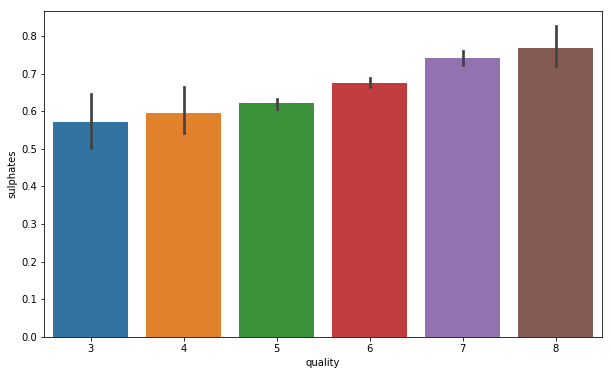

In [12]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

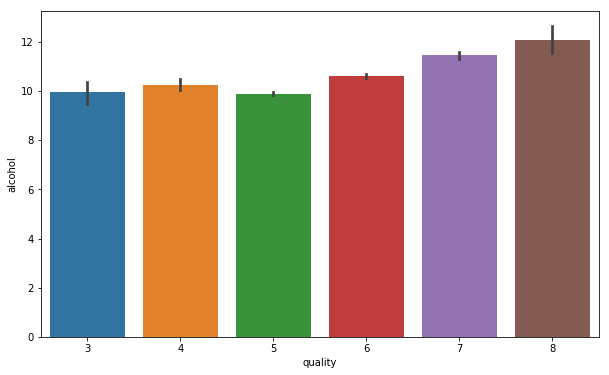

In [13]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

### Preprocessing Data for performing Machine learning algorithms


In [14]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)


In [15]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [16]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [17]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

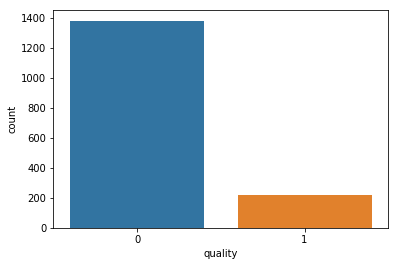

In [18]:
sns.countplot(wine['quality'])

In [19]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [20]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [21]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Our training and testing data is ready now to perform machine learning algorithm

In [23]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [24]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))


             precision    recall  f1-score   support

          0       0.90      0.97      0.94       273
          1       0.70      0.40      0.51        47

avg / total       0.87      0.89      0.87       320



#### Random forest gives the accuracy of 87%

In [25]:
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 28  19]]


#### Stochastic Gradient Decent Classifier



credits:https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook
https://www.datacamp.com/community/tutorials/random-forests-classifier-python
https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652